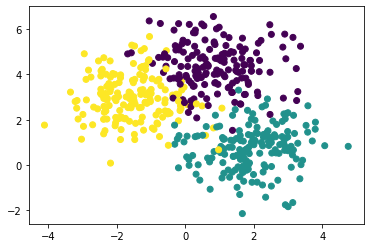

In [1]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


X, y = make_blobs(n_samples=500, centers=3, n_features=2)
n_features = X.shape[1]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [2]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args


model = GradientBoostingClassifier(n_estimators=50, random_state=0)

space = [Integer(1, 5, name='max_depth'),
         Real(10 ** -5, 10 ** 0, 'log-uniform', name='learning_rate'),
         Integer(1, n_features, name='max_features'),
         Integer(2, 100, name='min_samples_split'),
         Integer(1, 100, name='min_samples_leaf')]


@use_named_args(space)
def objective(**params):
    model.set_params(**params)
    
    return - np.mean(cross_val_score(model, X, y, cv=5, n_jobs=-1, 
                                     scoring='accuracy'))

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from skopt import gp_minimize


gp_res = gp_minimize(objective, space, n_calls=50, random_state=0)

f'Best score: {gp_res.fun:.4f}'

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


'Best score: -0.9360'

In [5]:
print(f'''Best parameters:
- max_depth = {gp_res.x[0]}
- learning_rate = {gp_res.x[1]:.6f}
- max_features = {gp_res.x[2]}
- min_samples_split = {gp_res.x[3]}
- min_samples_leaf = {gp_res.x[4]}
''')

Best parameters:
- max_depth = 1
- learning_rate = 0.286799
- max_features = 1
- min_samples_split = 2
- min_samples_leaf = 1



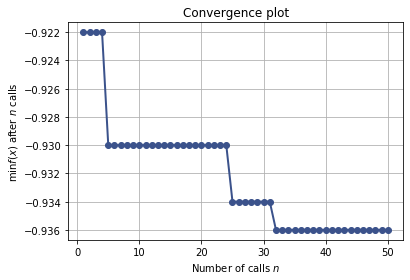

In [6]:
from skopt.plots import plot_convergence


plot_convergence(gp_res)
plt.show()

In [7]:
from skopt import dummy_minimize, forest_minimize


dummy_res = dummy_minimize(objective, space, n_calls=50, random_state=0)
forest_res = forest_minimize(objective, space, n_calls=50, random_state=0)

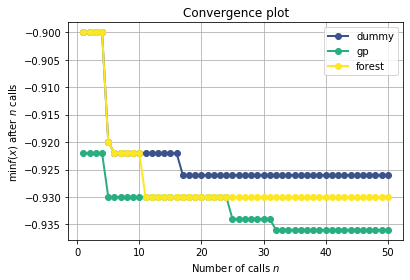

In [9]:
plot = plot_convergence(
    ('dummy', dummy_res),
    ('gp', gp_res),
    ('forest', forest_res)
)
plot.legend()
plt.show()
